In [143]:
import pandas as pd                      # ипортируем пандас

In [170]:
from sklearn import datasets

In [172]:
data = datasets.fetch_california_housing()

In [175]:
data

(20640, 8)

In [176]:
data['target']

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [177]:
from sklearn.linear_model import LinearRegression

In [187]:
lr = LinearRegression(fit_intercept=False, normalize=True)
lr.fit(data['data'], data['target'])

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=True)

In [188]:
pd.DataFrame(zip(
    data['feature_names'],
    lr.coef_
))

,0,1
0,MedInc,0.513515
1,HouseAge,0.015651
2,AveRooms,-0.182528
3,AveBedrms,0.865099
4,Population,0.000008
5,AveOccup,-0.004699
6,Latitude,-0.063946
7,Longitude,-0.016383


In [36]:
df = pd.read_csv('../01_eda_hw/UCI_Credit_Card.csv')  # читаем файл по дефолтам

In [37]:
df['default.payment.next.month'].value_counts()

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

In [38]:
y = df['default.payment.next.month']     # считываем в файл 

In [39]:
# del df['default.payment.next.month']
df = df.drop('default.payment.next.month', axis=1)

In [40]:
from sklearn.tree import DecisionTreeClassifier as BlackBox

In [41]:
model = BlackBox()
model.fit(df, y)
pred = model.predict(df)

In [42]:
pred

array([1, 1, 0, ..., 1, 1, 1])

In [43]:
from sklearn.metrics import precision_score, \
    recall_score, f1_score, accuracy_score

In [44]:
precision_score(y, pred), \
recall_score(y, pred), \
f1_score(y, pred), \
accuracy_score(y, pred)

(1.0, 1.0, 1.0, 1.0)

In [45]:
from sklearn.model_selection import train_test_split

In [107]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df,
    y,
    test_size=0.33,
    random_state=0
)

In [108]:
X_train

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
14756,14757,180000.0,1,1,2,28,0,0,0,0,...,184097.0,177870.0,169767.0,175867.0,9000.0,8500.0,8500.0,8000.0,14250.0,8000.0
13198,13199,400000.0,2,2,1,46,-1,-1,-1,-1,...,26181.0,134967.0,52991.0,163837.0,19753.0,26245.0,135000.0,53000.0,163837.0,37345.0
26215,26216,240000.0,2,1,1,42,-1,2,-1,-1,...,17601.0,1410.0,705.0,705.0,0.0,17601.0,2115.0,0.0,705.0,4000.0
5925,5926,290000.0,2,2,1,53,-1,-1,-1,-1,...,1440.0,1017.0,3798.0,4898.0,199.0,1440.0,1017.0,3798.0,4898.0,5034.0
6415,6416,80000.0,1,2,1,47,0,0,0,0,...,51047.0,48260.0,46198.0,43253.0,2022.0,1711.0,1584.0,1576.0,1690.0,1285.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,13124,30000.0,1,2,2,38,0,0,0,0,...,18432.0,17844.0,18237.0,10900.0,2100.0,2500.0,1000.0,1000.0,3000.0,7002.0
19648,19649,210000.0,2,1,1,33,0,0,0,0,...,192717.0,195700.0,150525.0,137565.0,7000.0,7791.0,7000.0,5254.0,5400.0,5380.0
9845,9846,130000.0,2,3,1,43,0,0,0,0,...,66370.0,43882.0,41063.0,29215.0,5000.0,3000.0,2500.0,4100.0,0.0,5000.0
10799,10800,50000.0,2,3,1,29,0,0,0,0,...,49054.0,7378.0,8103.0,8963.0,2500.0,3125.0,417.0,1000.0,1000.0,500.0


In [110]:
model = BlackBox(max_depth=5)

model.fit(X_train, y_train)

pred = model.predict(X_test)

In [116]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [121]:
model.predict_proba(X_test)[:, 1]

array([0.4691358 , 0.22347267, 0.08973698, ..., 0.22347267, 0.14600686,
       0.4691358 ])

In [120]:
[int(x > 0.2) for x in model.predict_proba(X_test)[:, 1]]

[1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [77]:
import numpy

In [101]:
pred = [numpy.random.randint(2) for _ in y_test]

In [102]:
precision_score(y_test, pred), \
recall_score(y_test, pred), \
f1_score(y_test, pred), \
accuracy_score(y_test, pred)

(0.2151418298042349,
 0.5044496487119438,
 0.3016384259907576,
 0.49626262626262624)

In [63]:
precision_score(y_test, pred), \
recall_score(y_test, pred), \
f1_score(y_test, pred), \
accuracy_score(y_test, pred)

(0.37642105263157893,
 0.41427247451343835,
 0.3944407677035076,
 0.7227272727272728)

In [76]:
precision_score(y_test, pred), \
recall_score(y_test, pred), \
f1_score(y_test, pred), \
accuracy_score(y_test, pred)

(0.6998031496062992,
 0.3330210772833724,
 0.4512853062519835,
 0.8253535353535354)

In [73]:
X_test

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
8225,8226,20000.0,1,1,2,33,1,2,2,2,...,19057.0,18453.0,19755.0,19288.0,0.0,2260.0,0.0,1600.0,0.0,644.0
10794,10795,20000.0,2,2,2,35,0,0,2,0,...,18600.0,19000.0,19000.0,20000.0,3400.0,0.0,1000.0,0.0,1000.0,0.0
9163,9164,230000.0,2,1,1,44,1,-1,-1,-1,...,2864.0,933.0,0.0,0.0,949.0,2873.0,933.0,0.0,0.0,0.0
26591,26592,100000.0,1,2,1,42,0,0,0,0,...,16138.0,17758.0,18774.0,20272.0,5000.0,2000.0,2000.0,2000.0,2000.0,2000.0
6631,6632,150000.0,1,1,2,29,-2,-2,-2,-2,...,831.0,6469.0,5138.0,7810.0,6989.0,833.0,6488.0,5153.0,7833.0,7130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2029,2030,30000.0,2,2,1,24,2,2,0,0,...,28301.0,31072.0,24147.0,4007.0,0.0,1400.0,3561.0,483.0,80.0,0.0
21259,21260,210000.0,1,1,1,50,1,-2,-2,-2,...,0.0,0.0,0.0,484.0,0.0,0.0,0.0,0.0,484.0,0.0
14808,14809,170000.0,1,1,1,35,-1,-1,-1,-1,...,526.0,526.0,635.0,760.0,326.0,526.0,526.0,635.0,760.0,526.0
7867,7868,60000.0,2,2,2,44,0,0,0,-1,...,67300.0,590.0,0.0,0.0,3400.0,1650.0,1180.0,0.0,0.0,400.0


In [123]:
model = BlackBox(max_depth=5)
model.fit(X_train, y_train)
pred = model.predict_proba(X_test)[:,1]

In [125]:
from sklearn.metrics import precision_recall_curve

In [126]:
precision, recall, thresholds = precision_recall_curve(y_test, pred)

In [127]:
from matplotlib import pyplot as plt

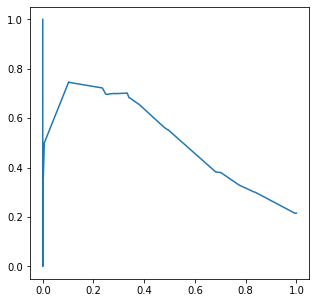

In [133]:
_, ax = plt.subplots(figsize=(5,5))
ax.plot(recall, precision)

In [146]:
pd.DataFrame(zip(pred, y_test)).sort_values(0)

,0,1
2904,0.000000,1
4947,0.000000,1
9403,0.083333,0
5634,0.083333,0
6713,0.083333,0
...,...,...
9269,1.000000,0
7953,1.000000,0
5764,1.000000,0
8338,1.000000,0


In [144]:
from sklearn.metrics import roc_curve, roc_auc_score

In [145]:
roc_auc_score(y_test, pred)

0.7537073067010893

In [163]:
pred_rand = [numpy.random.rand() for _ in y_test]

In [164]:
fpr, tpr, thresholds = roc_curve(y_test, pred_rand)

In [166]:
roc_auc_score(y_test, pred_rand)

0.49739975962517213

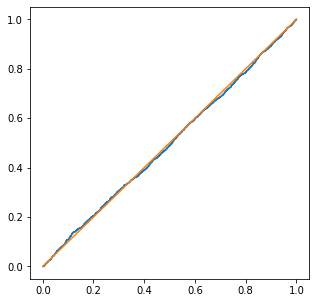

In [165]:
_, ax = plt.subplots(figsize=(5,5))
ax.plot(fpr, tpr)
ax.plot([0,1], [0,1])

In [167]:
roc_auc_score([0, 0, 1, 1], [0.92, 0.93, 0.9, 0.91])

0.0

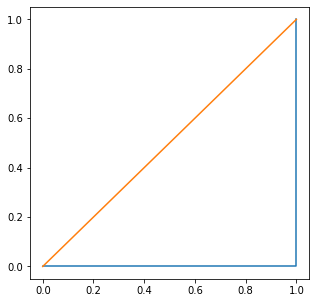

In [169]:
_, ax = plt.subplots(figsize=(5,5))
fpr, tpr, thresholds = roc_curve([0, 0, 1, 1], [0.92, 0.93, 0.9, 0.91])
ax.plot(fpr, tpr)
ax.plot([0,1], [0,1])

In [103]:
from sklearn.ensemble import RandomForestClassifier

lr = RandomForestClassifier(n_estimators=1000, n_jobs=20) 

In [104]:
                                                       # важно следующее
lr.fit(X_train, y_train)                                                      # одной строчкой обучаем
pred = lr.predict(X_test)                                              # одной строчкой получаем предсказания

In [105]:
pred

array([1, 0, 0, ..., 0, 0, 1])

In [106]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('precision', precision_score(y_test, pred))
print('recall', recall_score(y_test, pred))
print('f1', f1_score(y_test, pred))

precision 0.6616541353383458
recall 0.37096018735362996
f1 0.47539015606242496


In [34]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('precision', precision_score(y_test, pred))
print('recall', recall_score(y_test, pred))
print('f1', f1_score(y_test, pred))

precision 0.7193460490463215
recall 0.23978201634877383
f1 0.35967302452316074


In [26]:
df['default.payment.next.month'].value_counts()

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

In [32]:
# LinearRegression - коробочка для регрессии
# LogisticRegression - коробочка для классификации

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop('default.payment.next.month', axis=1),
    y, test_size=0.33, random_state=42)

In [45]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression                # ипортируем модель машинного обучения 
                                                                   # (неважно какую, для нас это пока черный ящик)
lr = RandomForestClassifier(n_estimators=10000, n_jobs=20)                              # объявляем эту модель с каким-то параметром
                                                                   # важно следующее
lr.fit(X_train, y_train)                                                      # одной строчкой обучаем
pred = lr.predict(X_test)                                              # одной строчкой получаем предсказания

In [53]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('precision', precision_score(y_test, pred))
print('recall', recall_score(y_test, pred))
print('f1', f1_score(y_test, pred))

precision 0.6395161290322581
recall 0.3674698795180723
f1 0.46674514420247204


In [43]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('precision', precision_score(y_test, pred))
print('recall', recall_score(y_test, pred))
print('f1', f1_score(y_test, pred))

precision 0.6850605652759085
recall 0.23586654309545876
f1 0.35091347811099627


In [41]:
X_test

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
2308,2309,30000.0,1,2,2,25,0,0,0,0,...,11581.0,12580.0,13716.0,14828.0,1500.0,2000.0,1500.0,1500.0,1500.0,2000.0
22404,22405,150000.0,2,1,2,26,0,0,0,0,...,116684.0,101581.0,77741.0,77264.0,4486.0,4235.0,3161.0,2647.0,2669.0,2669.0
23397,23398,70000.0,2,3,1,32,0,0,0,0,...,68530.0,69753.0,70111.0,70212.0,2431.0,3112.0,3000.0,2438.0,2500.0,2554.0
25058,25059,130000.0,1,3,2,49,0,0,0,0,...,16172.0,16898.0,11236.0,6944.0,1610.0,1808.0,7014.0,27.0,7011.0,4408.0
2664,2665,50000.0,2,2,2,36,0,0,0,0,...,42361.0,19574.0,20295.0,19439.0,2000.0,1500.0,1000.0,1800.0,0.0,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3672,3673,100000.0,2,1,2,26,-1,-1,-2,-2,...,-73.0,-73.0,-73.0,-73.0,0.0,0.0,0.0,0.0,0.0,0.0
9812,9813,110000.0,1,2,1,32,0,0,0,0,...,83913.0,47369.0,48905.0,46046.0,3851.0,3021.0,1649.0,3513.0,0.0,1664.0
19631,19632,170000.0,2,1,1,41,0,0,0,0,...,98505.0,99970.0,102303.0,104654.0,3500.0,5000.0,4000.0,4000.0,4000.0,4000.0
27301,27302,30000.0,1,2,2,30,0,0,0,0,...,28561.0,-229.0,23930.0,26655.0,1856.0,1000.0,1698.0,24860.0,3500.0,3000.0


## Подозретельно хорошее качество

In [104]:
# смотрим данные
df.head(2).T

,0,1
ID,1.0,2.0
LIMIT_BAL,20000.0,120000.0
SEX,2.0,2.0
EDUCATION,2.0,2.0
MARRIAGE,1.0,2.0
AGE,24.0,26.0
PAY_0,2.0,-1.0
PAY_2,2.0,2.0
PAY_3,-1.0,0.0
PAY_4,-1.0,0.0


In [105]:
# видим что таргет default.payment.next.month остался в данных
# модель смотрит только на него, и если там 1, она предсказывает 1, если там 0, она предсказывает 0
# такое нам не интересно
# повторяем все аналогично, но при этом удалим из df таргет (он все равно останется в y)

In [106]:
df_without_target = df.drop('default.payment.next.month', axis=1)

In [107]:
lr = LogisticRegression(penalty='l1')                      # объявляем еще раз эту модель с каким-то параметром
                                                           # важно следующее
lr.fit(df_without_target, y)                               # одной строчкой обучаем
pred = lr.predict(df_without_target)                       # одной строчкой получаем предсказания

/home/jupyterhub/jupyterhub_venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [108]:
print('precision', precision_score(y, pred))
print('recall', recall_score(y, pred))
print('f1', f1_score(y, pred))

precision 0.7175090252707581
recall 0.23960216998191683
f1 0.359240849525531


In [109]:
# качество теперь не 100%, значит удаление таргета взяло свое)

## В заключении, сделаем трюк с делением выборки на 2 части

![](https://machine-learning-course.readthedocs.io/en/latest/_images/holdout.png)

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
X_train, X_test, y_train, y_test = train_test_split(
    df_without_target,                           # передаем данные без таргета
    y,                                           # передаем таргет
    test_size=0.2)                               # указываем в каких пропорциях поделить (тест будет 20% от всех данных)

In [112]:
lr = LogisticRegression(penalty='l1')    
lr.fit(X_train, y_train)                  # обчаем только на TRAIN части
pred = lr.predict(X_test)                 # предсказываем на TEST части

/home/jupyterhub/jupyterhub_venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [113]:
# смотрим качество сравнивая предсказания на TEST с реальными ответами на TEST
print('precision', precision_score(y_test, pred))
print('recall', recall_score(y_test, pred))
print('f1', f1_score(y_test, pred))

precision 0.6721991701244814
recall 0.2394678492239468
f1 0.353133514986376
